<a href="https://colab.research.google.com/github/enoc494/ProyectoCircuitos-ANN/blob/master/Borrador_Proyecto_Circuitos_RNAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto, borrador


# Parte I: Preprocesado y carga

In [1]:
# Bloque de imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from PIL import Image,ImageOps #Libreria de imagenes
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle #porque sino vamos a meter en orden las cosas***
import tensorflow as tf

#Para descargar los archivos:
from google.colab import files


#Para tensorboard:
%load_ext tensorboard
import datetime

In [2]:
#Obtención de información desde Git
! git clone https://github.com/enoc494/ProyectoCircuitos-ANN.git

Cloning into 'ProyectoCircuitos-ANN'...
remote: Enumerating objects: 1499, done.
remote: Counting objects: 100% (1499/1499), done.
remote: Compressing objects: 100% (1400/1400), done.
remote: Total 1499 (delta 112), reused 1468 (delta 96), pack-reused 0
Receiving objects: 100% (1499/1499), 76.69 MiB | 36.53 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [3]:
%ls

ProyectoCircuitos-ANN/  sample_data/


In [4]:
%cd ProyectoCircuitos-ANN/

/content/ProyectoCircuitos-ANN


In [5]:
%ls

Borrador_Proyecto_Circuitos_RNAA.ipynb  Data0/  Log.txt  README.md


In [6]:
!cd /content/ProyectoCircuitos-ANN

In [7]:
os.getcwd()

'/content/ProyectoCircuitos-ANN'

In [8]:
#paths declarados de utilidad 
dir = os.getcwd()
dirData = dir+'/Data0'



In [9]:
os.listdir()

['README.md',
 'Borrador_Proyecto_Circuitos_RNAA.ipynb',
 'Data0',
 '.git',
 'Log.txt']

In [10]:
#listado de dispositivos
os.chdir(dirData)
listaDispositivos = os.listdir()

In [11]:
listaDispositivos

['CircuitosIntegrados',
 'CapacitorCeramico',
 'Led',
 'CapacitoresElectroliticos',
 'Potenciometros',
 'Baterias',
 'Resistencias',
 'Imagenes',
 'Conectores',
 'Motores',
 'Fusibles',
 'Bobinas',
 'Transistores',
 'Ventiladores',
 'LCD',
 'Switch-BAD',
 'Bocinas']

In [12]:
# Ejemplo de un preprocesado:
os.chdir(dirData+'/'+listaDispositivos[0])
listaDeTipos = os.listdir()

os.chdir(dirData+'/'+listaDispositivos[3]+'/'+listaDeTipos[2])
imagenes = os.listdir()

In [13]:
listaDeTipos

['Esquematico', 'Circuito', 'FondoBlanco', 'Protoboard']

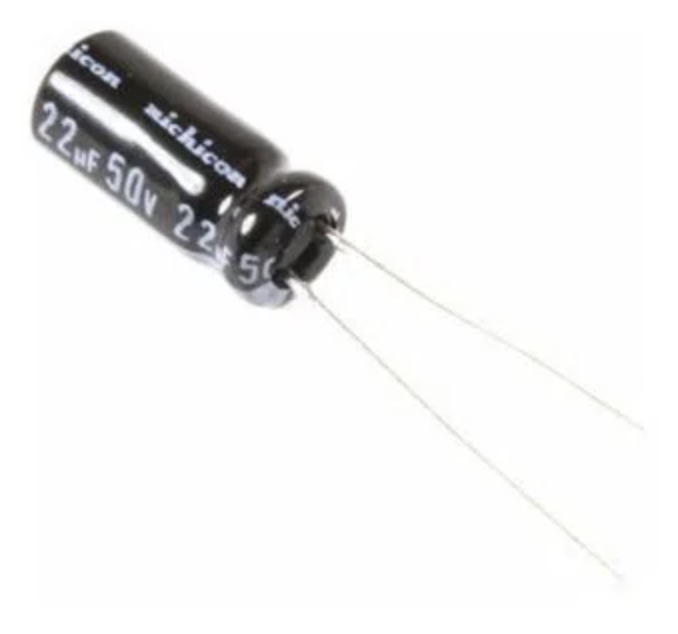

In [14]:
imagen = Image.open(imagenes[10])
imagen

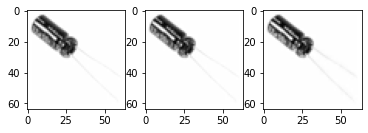

In [15]:
imagen  = imagen.resize((64,64))  #Escalar, 32 x 32 en ejemplo
#imagen  = ImageOps.equalize(imagen, mask = None)
 #Ilustración de las 3 capas a usar
imagen2 = np.array(imagen)
imagen2.shape
imagen2=imagen2.transpose( 2,0,1 )

fig1 = plt.figure(figsize=(6,10))
ax   = fig1.add_subplot(1,3,1)
ax.imshow(imagen2[0],cmap='gray')
ax   = fig1.add_subplot(1,3,2)
ax.imshow(imagen2[1],cmap='gray')
ax   = fig1.add_subplot(1,3,3)
ax.imshow(imagen2[2],cmap='gray')

#### Función de Carga, Preprocesado y Guardado de Datos


In [16]:
#función para preprocesar datos:
def PreprocesarDatos(resize,dispositivos,tipos):
  """
  Ingresa la información de dónde extraer las imagenes, 
  donde guardarlas, 
  el tamaño deseado,
  la lista de dispositivos a revisar
  la lista de tipos a revisar
  """
  os.chdir(dir) # Carpeta superior 
  #Preparamos sitios de almacenamiento
  try:
      os.chdir( dir +'/DataPrep')  
  except FileNotFoundError:
      os.mkdir( dir +'/DataPrep')
      os.chdir( dir +'/DataPrep')  #Creación/Cambio a DataPrep 

  for dispositivo in dispositivos:   
    #Creamos carpeta para dispositivo
    try:
      os.chdir( dir +'/DataPrep/'+dispositivo)  
    except FileNotFoundError:
      os.mkdir( dir +'/DataPrep/'+dispositivo)
      os.chdir( dir +'/DataPrep/'+dispositivo)

    for tipo in tipos:
      #Por cada dispositivo realizaremos 4 carpetas de tipos
      try:
        os.chdir( dir+'/DataPrep/'+dispositivo+'/'+tipo)  
      except FileNotFoundError:
        os.mkdir( dir+'/DataPrep/'+dispositivo+'/'+tipo)
        os.chdir( dir+'/DataPrep/'+dispositivo+'/'+tipo)
      #Con la carpeta destino creada nos movemos a la ubicación de las imagenes

      os.chdir(dir+'/Data0/'+dispositivo+'/'+tipo) #Se supone existe
      print('Actualmente en: ',dispositivo+', '+tipo)
      
      imagenes = os.listdir()
    
      #Acumuladores de datos procesados
      x_v=[]
      y_v=[]
      for imagenName in imagenes:
    
        imagen  = Image.open(imagenName)
        imagen = imagen.convert('RGB') #Todo a RGB

        imagen  = imagen.resize((resize,resize))  #Escalar

        imagen = np.array(imagen)
        imagen = imagen/255 #Normalizado
     
        #Revisar que todas las imagenes cumplan*
        x_v.append(imagen)

      y_v.append(dispositivo)
      y_v=y_v*len(x_v) #Número de veces que se debe repetir el target
      x_v=np.array(x_v)
      y_v=np.array(y_v)
    
      #Esto se puede hacer con un with
      os.chdir(dir +'/DataPrep/'+dispositivo+'/'+tipo) 
      pickle.dump(x_v, open(dispositivo+"Data", 'wb'))
      pickle.dump(y_v, open(dispositivo+"Target", 'wb'))
      #Regresamos al directorio donde se encuentran el resto, mejorar con with




In [21]:
#Manipulación particular para solo cargar ciertos elementos:
listaDispositivos.remove("Switch-BAD")

In [22]:
#Implementación de la función anterior
PreprocesarDatos(32,listaDispositivos[:],[listaDeTipos[2]])

Actualmente en:  CircuitosIntegrados, FondoBlanco
Actualmente en:  CapacitorCeramico, FondoBlanco
Actualmente en:  Led, FondoBlanco
Actualmente en:  CapacitoresElectroliticos, FondoBlanco
Actualmente en:  Potenciometros, FondoBlanco
Actualmente en:  Baterias, FondoBlanco
Actualmente en:  Resistencias, FondoBlanco
Actualmente en:  Imagenes, FondoBlanco
Actualmente en:  Conectores, FondoBlanco
Actualmente en:  Motores, FondoBlanco
Actualmente en:  Fusibles, FondoBlanco


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Actualmente en:  Bobinas, FondoBlanco
Actualmente en:  Transistores, FondoBlanco
Actualmente en:  Ventiladores, FondoBlanco
Actualmente en:  LCD, FondoBlanco
Actualmente en:  Bocinas, FondoBlanco


In [23]:
dir+'/DataPrep'

'/content/ProyectoCircuitos-ANN/DataPrep'

In [26]:
!zip -r /content/ProyectoCircuitos-ANN/file.zip /content/ProyectoCircuitos-ANN/DataPrep

  adding: content/ProyectoCircuitos-ANN/DataPrep/ (stored 0%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/ (stored 0%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/F/ (stored 0%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Esquematico/ (stored 0%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Esquematico/CircuitosIntegradosData (deflated 93%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Esquematico/CircuitosIntegradosTarget (deflated 91%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Circuito/ (stored 0%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Circuito/CircuitosIntegradosData (deflated 80%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/Circuito/CircuitosIntegradosTarget (deflated 91%)
  adding: content/ProyectoCircuitos-ANN/DataPrep/CircuitosIntegrados/FondoBlanco/ (stored 0%)
  adding: conte

In [28]:
#Descarga del FOLDER con modificaciones
files.download("/content/ProyectoCircuitos-ANN/file.zip") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Función de Carga de datos Preprocesados

In [ ]:
def CargadorDatos(dirOrigen, n,personajes):
  #Se elige directorio origen y número de personajes
  x_v =[]
  y_v =[]
  i = 0 #indice de personaje
  t = 0 #total de personajes agregados
  while t < n:
  
    personaje = personajes[i]
    os.chdir(dirOrigen+'/'+personaje)

    #cargar todo  con 64x64 

    #LOAD 
    data = pickle.load(open(personaje+'Data','rb')) 
    
    #If a implementar para regular que personajes pueden ser cargados
    # 0 -> todos serán considerados
    # 
    if(len(data)>0):    
      t=t+1
      x_v.extend( data )
      y_v.extend( pickle.load( open(personaje+'Target','rb'))  )
    i=i+1 
  return np.array(x_v) , np.array(y_v)

In [ ]:
#implementación de la función anterior


In [ ]:
#Forma de los datos